## 圖像閾值
ret, dst = cv2.threshold(src, thresh, maxval, type)
* src: 輸入, 只能單通道(灰階圖)
* dst: 輸出
* thresh: 閾值
* maxval: 當像素值超過閾值(or < 閾值, 依據type決定), 所賦予的值
* type: 二值化操作的類型
    - cv2.THRESH_BINARY: 超過閾值的部分取maxval, 否則取0
    - cv2.THRESH_BINARY_INV: THRESH_BINARY的反轉
    - cv2.THRESH_TRUNC: 大於閾值的部分設為閾值, 否則不變
    - cv2.THRESH_TOZERO: 大於閾值的部分不改變, 否則設為0
    - cv2.THRESH_TOZERO_INV: THRESH_TOZERO的反轉

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
path = 'dataset/cat.jpg'
img = cv2.imread(path)
img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

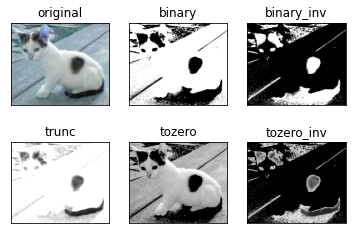

In [4]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['original', 'binary', 'binary_inv', 'trunc', 'tozero', 'tozero_inv']
img = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(img[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## 平滑處理

In [5]:
path = 'dataset/lenaNoise.png'

In [6]:
def cv_show(img, name='image'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [11]:
img = cv2.imread(path)
cv_show(img)

In [10]:
# 均值濾波
# 簡單的平均捲積
blur = cv2.blur(img, (3, 3))
cv_show(blur)

In [9]:
# 方框濾波
# 可以選擇正規化
box = cv2.boxFilter(img, -1, (3, 3), normalize=True) 
cv_show(box)

In [12]:
# 容易越界( > 255 就取 255)
box = cv2.boxFilter(img, -1, (3, 3), normalize=False)
cv_show(box)

In [26]:
# 高斯濾波
gaussian = cv2.GaussianBlur(img, (3, 3), 1)
cv_show(gaussian)

In [24]:
# 中值濾波
# 用中位數濾波
median = cv2.medianBlur(img, 3)
cv_show(median)

In [27]:
# show all
res = np.hstack((blur, gaussian, median))
cv_show(res)